<a href="https://colab.research.google.com/github/bsong75/brendensong.github.io/blob/main/1.a.%20LinearReg_FIFA2019_Players_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from pandas import read_csv
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report


In [ ]:
df=pd.read_csv('/content/data3.csv')

In [ ]:
df.describe()

,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Total Skillset,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKRating
count,501.000000,501.000000,5.010000e+02,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.00000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,82.894212,84.812375,2.699002e+07,93.101796,1.738523,2.500998,2021.463074,3.313373,3.045908,63.630739,59.556886,61.435130,74.03992,58.716567,70.109780,63.289421,57.441118,68.117764,73.786427,71.281437,71.622754,71.155689,80.678643,67.822355,69.792415,70.003992,72.736527,71.297405,62.688623,65.838323,58.037924,63.954092,71.177645,59.770459,77.093812,57.522954,56.510978,53.237525,92.756487
std,2.689756,3.228115,1.651782e+07,76.392013,0.439878,0.875499,278.764476,0.771752,1.106295,21.925359,23.478741,21.453351,15.78830,22.524198,22.084789,22.738999,21.972779,15.750940,19.549330,14.182476,13.059074,14.762781,4.182167,15.936699,18.997285,12.501999,15.567866,11.754207,22.873803,18.228434,24.457975,24.240212,13.478515,18.479968,8.215180,23.927264,26.499856,26.630236,113.989563
min,80.000000,80.000000,0.000000e+00,0.000000,1.000000,1.000000,1103.000000,1.000000,1.000000,9.000000,8.000000,10.000000,15.00000,8.000000,9.000000,9.000000,8.000000,16.000000,14.000000,30.000000,33.000000,29.000000,66.000000,25.000000,14.000000,30.000000,20.000000,34.000000,7.000000,11.000000,10.000000,7.000000,22.000000,11.000000,20.000000,9.000000,10.000000,8.000000,5.000000
25%,81.000000,82.000000,1.700000e+07,40.000000,1.000000,2.000000,1970.000000,3.000000,2.000000,55.000000,45.000000,52.000000,74.00000,45.000000,64.000000,52.000000,45.000000,64.000000,73.000000,63.000000,65.000000,61.000000,78.000000,57.000000,66.000000,63.000000,68.000000,63.000000,52.000000,56.000000,35.000000,50.000000,63.000000,50.000000,74.000000,36.000000,32.000000,27.000000,48.000000
50%,82.000000,84.000000,2.200000e+07,73.000000,2.000000,3.000000,2111.000000,3.000000,3.000000,72.000000,68.000000,67.000000,79.00000,66.000000,79.000000,72.000000,63.000000,72.000000,81.000000,73.000000,73.000000,74.000000,81.000000,71.000000,77.000000,72.000000,76.000000,72.000000,72.000000,70.000000,66.000000,75.000000,75.000000,64.000000,78.000000,63.000000,64.000000,56.000000,53.000000
75%,84.000000,87.000000,3.150000e+07,125.000000,2.000000,3.000000,2191.000000,4.000000,4.000000,79.000000,78.000000,79.000000,83.00000,76.000000,84.000000,80.000000,75.000000,79.000000,84.000000,83.000000,80.000000,82.000000,83.000000,80.000000,82.000000,78.000000,83.000000,80.000000,79.000000,80.000000,81.000000,81.000000,81.000000,74.000000,82.000000,79.000000,82.000000,79.000000,61.000000
max,94.000000,95.000000,1.185000e+08,565.000000,2.000000,5.000000,2438.000000,5.000000,5.000000,93.000000,95.000000,94.000000,93.00000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,94.000000,94.000000,94.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,444.000000


In [ ]:
df. isnull().sum()

In [ ]:
#dropped columns that I am not interested in  df.drop(['....'],axis=1,inplace=True)

___Step 2: Data Analysis____________________

2.a.Exploration

In [ ]:
#Player with maximum Potential and Overall Performance
print('Maximum Potential : '+str(df.loc[df['Potential'].idxmax()][1]))
print('Maximum Overall Perforamnce : '+str(df.loc[df['Overall'].idxmax()][1]))

Maximum Potential : 95
Maximum Overall Perforamnce : 94


2.B. Univariate Plot

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


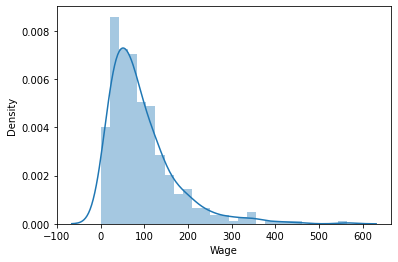

In [ ]:
sns.distplot(df['Wage'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


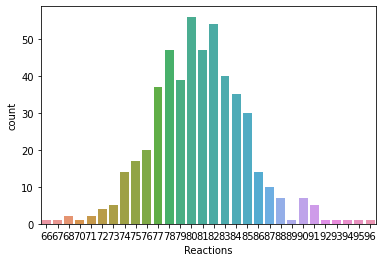

In [ ]:
sns.countplot(df['Reactions'])

2.c. Multivariate Plot

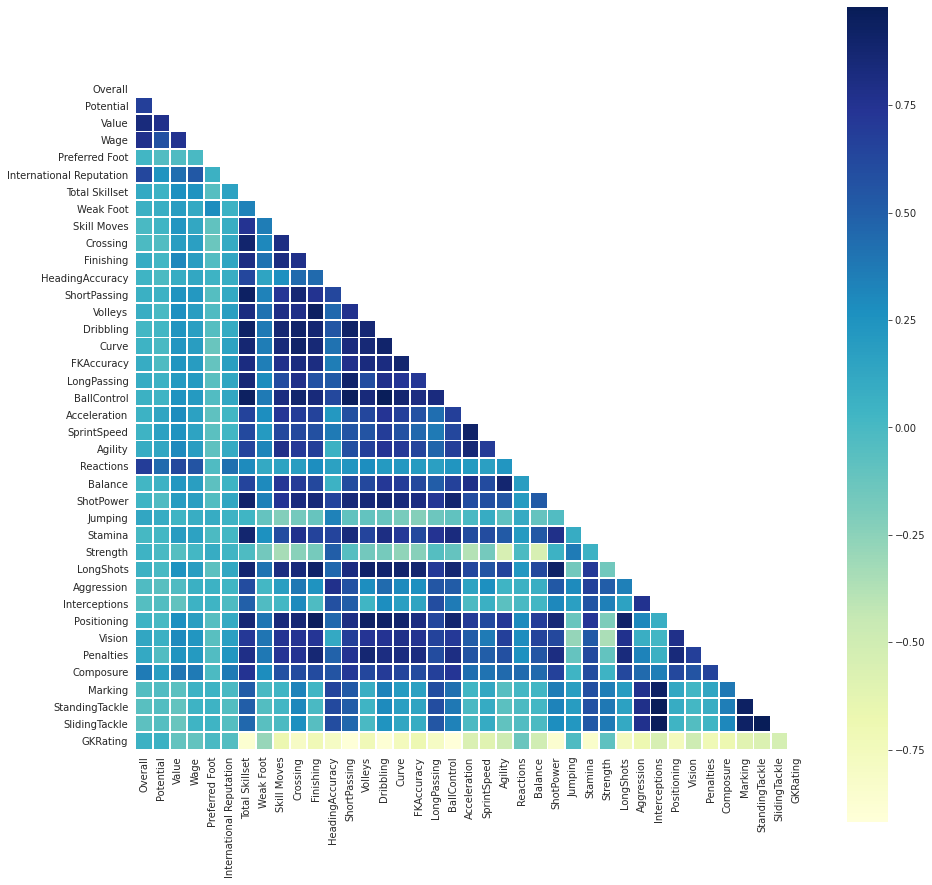

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")

In [ ]:
corrmat=df.corr()
corrmat

,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Total Skillset,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKRating
Overall,1.000000,0.680896,0.833731,0.770664,0.025595,0.631500,0.111953,0.071884,-0.003742,-0.007887,0.089166,0.043361,0.072156,0.085863,0.020767,0.045725,0.090366,0.092255,0.059209,0.051690,0.046291,0.089264,0.683966,0.024429,0.037575,0.126160,0.013805,0.051225,0.066006,-0.027680,-0.048673,0.046980,0.126189,0.116557,0.367109,-0.039879,-0.064506,-0.075121,0.061102
Potential,0.680896,1.000000,0.777904,0.574347,-0.034619,0.250578,0.056697,0.079041,0.030418,-0.034127,0.025025,-0.007887,0.054340,-0.004914,0.026015,-0.007378,-0.018174,0.056527,0.043891,0.138369,0.163892,0.128027,0.441286,0.057043,-0.029727,0.095762,0.019231,-0.003059,0.005437,-0.063395,-0.042416,0.007148,0.069303,-0.036227,0.184907,-0.032311,-0.040282,-0.047151,0.062304
Value,0.833731,0.777904,1.000000,0.754149,-0.022656,0.423654,0.268961,0.186319,0.231791,0.185544,0.305001,0.093044,0.246763,0.268087,0.243432,0.235706,0.241397,0.210275,0.257387,0.281586,0.258000,0.297495,0.623651,0.225658,0.196308,0.039856,0.199399,-0.049903,0.252038,-0.023336,-0.095272,0.270860,0.298988,0.250978,0.395891,-0.073062,-0.098432,-0.122589,-0.101286
Wage,0.770664,0.574347,0.754149,1.000000,-0.003908,0.534514,0.258698,0.115986,0.121063,0.174728,0.190775,0.119567,0.219939,0.190386,0.177155,0.189276,0.195348,0.209104,0.213354,0.167396,0.151968,0.190864,0.558190,0.178840,0.178086,0.081748,0.162140,0.015484,0.188061,0.073624,0.057729,0.181977,0.229922,0.210813,0.375698,0.054655,0.048934,0.038654,-0.099754
Preferred Foot,0.025595,-0.034619,-0.022656,-0.003908,1.000000,0.060402,-0.053731,0.283094,-0.094469,-0.130929,-0.036222,0.049169,-0.045723,-0.026672,-0.048920,-0.122588,-0.108473,-0.063094,-0.034184,-0.082433,-0.071520,-0.088270,-0.029460,-0.075681,-0.043127,0.094383,-0.013001,0.095141,-0.080859,0.057075,0.043680,-0.057399,-0.063664,-0.036184,-0.013123,0.044372,0.047001,0.039801,-0.002908
International Reputation,0.631500,0.250578,0.423654,0.534514,0.060402,1.000000,0.159091,0.057257,0.083582,0.104887,0.134875,0.082714,0.115026,0.181050,0.099760,0.157962,0.180305,0.126678,0.126390,0.028729,0.024261,0.109390,0.417132,0.047818,0.130724,0.047325,0.021296,0.033885,0.123455,0.029649,-0.021998,0.107484,0.177012,0.235934,0.374967,-0.004894,-0.043642,-0.046461,-0.039858
Total Skillset,0.111953,0.056697,0.268961,0.258698,-0.053731,0.159091,1.000000,0.336430,0.748378,0.894234,0.803349,0.636452,0.930553,0.820545,0.920358,0.873355,0.820227,0.852596,0.934786,0.657837,0.620420,0.649781,0.290984,0.649605,0.897658,0.029770,0.884948,-0.020976,0.877280,0.607339,0.493292,0.862677,0.716237,0.790661,0.743762,0.513831,0.503552,0.458782,-0.872232
Weak Foot,0.071884,0.079041,0.186319,0.115986,0.283094,0.057257,0.336430,1.000000,0.357918,0.309791,0.413755,0.145281,0.337594,0.414253,0.374533,0.361683,0.352026,0.287354,0.372836,0.279537,0.209801,0.322220,0.116776,0.302767,0.343982,-0.109992,0.259913,-0.157792,0.403094,0.018536,-0.024047,0.387141,0.396481,0.383684,0.283047,-0.003694,-0.038357,-0.061434,-0.282586
Skill Moves,-0.003742,0.030418,0.231791,0.121063,-0.094469,0.083582,0.748378,0.357918,1.000000,0.800670,0.811737,0.271175,0.731924,0.794715,0.867170,0.839826,0.777580,0.603757,0.818494,0.732253,0.627205,0.782320,0.150168,0.729079,0.735588,-0.217787,0.597708,-0.338343,0.811388,0.178193,0.017528,0.838881,0.742651,0.735391,0.571462,0.033167,0.025259,-0.014356,-0.670157
Crossing,-0.007887,-0.034127,0.185544,0.174728,-0.130929,0.104887,0.894234,0.309791,0.800670,1.000000,0.782206,0.451249,0.863616,0.788495,0.905476,0.907759,0.818690,0.782654,0.894064,0.690722,0.628169,0.704227,0.185888,0.699467,0.824477

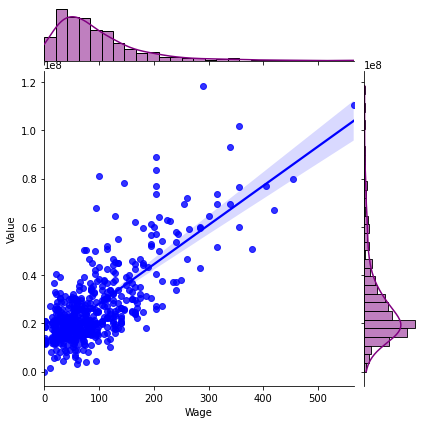

In [ ]:
sns.jointplot(x=df['Wage'],y=df['Value'],
              joint_kws={'color':'blue'},
              marginal_kws={'color':'purple'}, kind="reg")

In [ ]:
from scipy import stats
corr= stats.pearsonr(x=df['Wage'],y=df['Value'])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 3.4819254864522258e-93
cor:		 0.7541489639676868


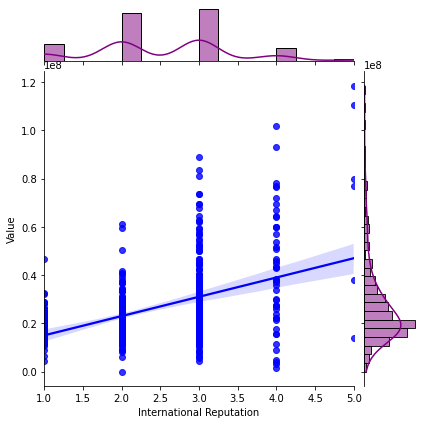

In [ ]:
sns.jointplot(x=df['International Reputation'],y=df['Value'],
              joint_kws={'color':'blue'},
              marginal_kws={'color':'purple'}, kind="reg")

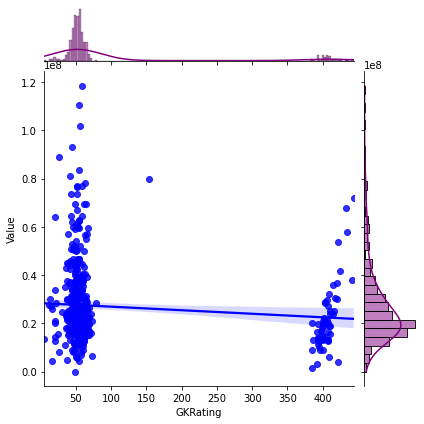

In [ ]:
sns.jointplot(x=df['GKRating'],y=df['Value'],
              joint_kws={'color':'blue'},
              marginal_kws={'color':'purple'}, kind="reg")

In [ ]:
from scipy import stats
corr= stats.pearsonr(x=df['GKRating'],y=df['Value'])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 0.023374466403363242
cor:		 -0.1012860054193689


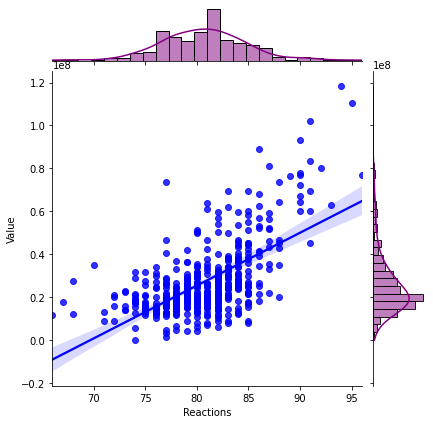

In [ ]:
sns.jointplot(x=df['Reactions'],y=df['Value'],
              joint_kws={'color':'blue'},
              marginal_kws={'color':'purple'}, kind="reg")

In [ ]:
#Split Value as a Target value
target = df.Value
df2 = df.drop(['Value', 'Overall'], axis = 1)
#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.1)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(51, 37) (450, 37)
(51,) (450,)


In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
#How much of variance is explained by the model?
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.758709026176595
RMSE : 6821032.503902191


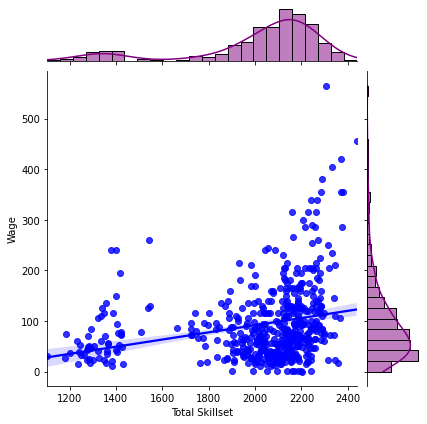

In [ ]:
sns.jointplot(x=df2['Total Skillset'],y=df2['Wage'],
              joint_kws={'color':'blue'},
              marginal_kws={'color':'purple'}, kind="reg")

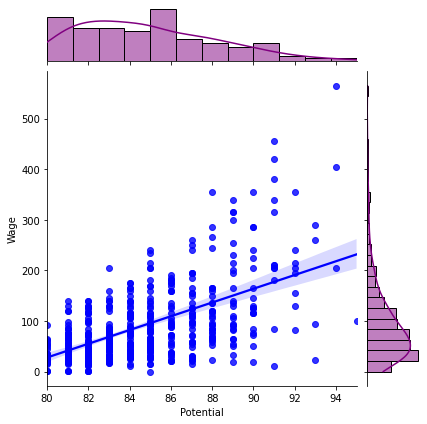

In [ ]:
sns.jointplot(x=df2['Potential'],y=df2['Wage'],
              joint_kws={'color':'blue'},
              marginal_kws={'color':'purple'}, kind="reg")